# Módulo 5 Actividad 4

### Intención del aprendizaje esperado:


4. Elaborar un modelo predictivo aplicando el algoritmo de Regresión Logística para resolver un problema de clasificación utilizando el lenguaje Python.


### Ejercicios Planteados


*El archivo diabetes.csv proviene del Instituto Nacional de Enfermedades Diabetológicas, Digestivas y Nefrológicas de los Estados Unidos. El objetivo de la base de datos es predecir si un paciente tiene o no diabetes, en base a ciertas mediciones diagnósticas incluidas en el conjunto de datos. Este es un subconjunto de una base de datos mucho más grande. Aquí se han seleccionado solo mujeres con edad mayor o igual a 21, descendientes del pueblo indígena Pima.*



**Las variables disponibles son las siguientes:**


- Pregnancies: número de veces embarazada.

- Glucose: concentración de glucosa en plasma 2 horas en una prueba de tolerancia a la glucosa oral.

- BoodPressure: presión arterial diastólica (mm Hg).

- SkinThickness: espesor de pliegue de la piel de los tríceps (mm).

- Insulin: insulina sérica de 2 horas (MU u/ml).

- BMI: índice de masa corporal (peso en kg/(altura en m)^2).

- DiabetesPedigreeFunction: Función de pedigrí de diabetes (DPF). Cálculo de una probabilidad de diabetes en función de la edad y de la historia diabética familiar.

- Age: edad en años.

- Outcome: variable categórica que indica si tiene un paciente tiene diabetes o no tiene diabetes.


**Requerimientos:**

1. Cargue los datos y muestre los primeros 6 registros. Identifique qué variable(s) es(son) numérica(s) y qué variable(s) es(son) categórica(s).

In [1]:
import pandas as pd

diabetes = pd.read_csv('diabetes.csv')
df_diabetes = pd.DataFrame(diabetes)

df_diabetes.head(6)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


*La única variable categórica es "outcome" que refiere a si un paciente está categorizado como diabético o no.  Todas las demás variables son numéricas.*

2. Separe el conjunto de datos en un conjunto de variables predictoras y otro con la variable respuesta.
3. A partir de lo anterior, genere conjuntos de datos de entrenamiento y de prueba, separando un 25% de los datos para fines de prueba.
4. Cree un modelo de Regresión Logística (con una semilla igual a 10 para fines de replicabilidad) y ajuste el modelo a los datos de entrenamiento. En este punto es posible que tenga problemas de convergencia del algoritmo. Si es así, intente incrementar el número de iteraciones del algoritmo (max_iter) o probar con un solucionador distinto (solver).
5. Genere predicciones con los datos de las variables predictoras del conjunto de datos de prueba.


In [2]:
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression

X = df_diabetes.drop('Outcome', axis = 1)
y = df_diabetes['Outcome']

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.25, random_state = 110)

modelo_regresion_logistica = LogisticRegression(random_state = 10, max_iter = 500, solver = 'lbfgs')
modelo_regresion_logistica.fit(X_train, y_train)

y_pred = modelo_regresion_logistica.predict(X_test)



6. Muestre la matriz de confusión como un objeto numpy.ndarray.

In [3]:
import numpy as np
from sklearn.metrics import confusion_matrix

matriz_de_confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión: \n", matriz_de_confusion)


Matriz de Confusión: 
 [[119  13]
 [ 21  39]]


7. Grafique la matriz de confusión usando un mapa de calor (Heatmap).

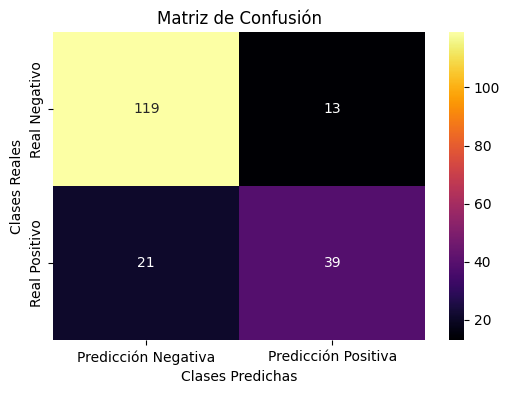

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns



# Crear el heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_de_confusion, annot=True, cmap='inferno', fmt='g', 
            xticklabels=['Predicción Negativa', 'Predicción Positiva'], 
            yticklabels=['Real Negativo', 'Real Positivo'])
plt.xlabel('Clases Predichas')
plt.ylabel('Clases Reales')
plt.title('Matriz de Confusión')
plt.show()


8. Genere las métricas de evaluación a este problema de clasificación. Comente los resultados.

In [5]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, roc_curve

accuracy = modelo_regresion_logistica.score(X_test, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(' MÉTRICAS DE EVALUACIÓN '.center(40, '='))
print()
print('Accuracy: '.ljust(33, '.') +  f'{accuracy:.4f}'.rjust(7))
print('Precision: '.ljust(33, '.') +  f'{precision:.4f}'.rjust(7))
print('Recall: '.ljust(33, '.') +  f'{recall:.4f}'.rjust(7))
print('F1 Score: '.ljust(33, '.') +  f'{f1:.4f}'.rjust(7))
print()
print(40 * '=')



======== MÉTRICAS DE EVALUACIÓN ========

Accuracy: ....................... 0.8229
Precision: ...................... 0.7500
Recall: ......................... 0.6500
F1 Score: ....................... 0.6964



- Accuracy (Exactitud), es una métrica que nos indica el porcentaje de resultados clasificados correctamente y se calcula dividiendo la cantidad de instancias correctamente clasificadas (la diagonal de arriba-izquierda, abajo-derecha) contra el total de casos evaluados.  Si bien es un indicador que en nuestro modelo tiene un resultado aceptable (82.29%), debe ser complementado con otras métricas pues es muy importante evaluar el error en la clasificación de lo que llamamos falsos negativos, clasificación que en esta métrica no es considerada de manera preponderante.

- Precision (Precisión) es la métrica que nos entrega el porcentaje de clasificaciones de *Verdaderos Positivos* contra el total de *verdaderos positivos más falsos positivos (cuadrantes del lado derecho de la matriz)*.  Si bien esta métrica incluye clasificaciones que no fueron acertadas, el error no resulta tan grave ya que no compromete, al menos en este caso, fallar de manera nociva pues considera a quienes verdaderamente deben ser reconocidos como *(verderos positivos)* y algunos que fueron considerados positivos pero no lo eran, en este caso 13 indiviuos.  EL valor de la métrica también resulta aceptable con un 75%, sin embargo debe ser contrastada con otras métricas para descartar errores importantes del modelo ya que implica que 1 de cada 4 clasificaciones son un fallo.

- Recall (Sensibilidad) es la métrica que nos entrega la proporción de *verdaderos positivos* contra la suma de *verdaderos positivos y falsos negativos (cuadrantes inferiores de la matriz)*.  Acá el valor de la métrica nos da una alerta de que el modelo no está funcionando tan bien pues en este calculo se incluye la clasificación que es más sensible al fallo y que puede traer consecuencias graves si no la corregimos.  En ese sentido el 65% resulta preocupante pues nos indica que la probabilidad de fallar ante un caso importante es cercana al 50%.

- F1 Score (media armónica entre precision y sensibilidad) es la métrica que nos permite evaluar de manera proporcionada dos métricas importantes del modelo lo que resulta valioso ya que en clasificaciones binarias puede existir un desbalance entre las distintas clases.  En este sentido nos permite evaluar de manera mas equilibrida el rendimiento del modelo.  En el caso del modelo en evaluación, el resultado de 69.64% resulta preocupante y una alerta para ajustarlo de mejor manera y de esta forma evitar fallas graves en lo que respecta a la clasificación de los eventos.

9. Genere la curva ROC y la métrica AUC. Comente los resultados.
10. En la curva ROC, ¿qué cree usted que representaría una línea recta entre el origen (0, 0) y el punto (1, 1)?

======================================== ANÁLISIS ROC =======================================


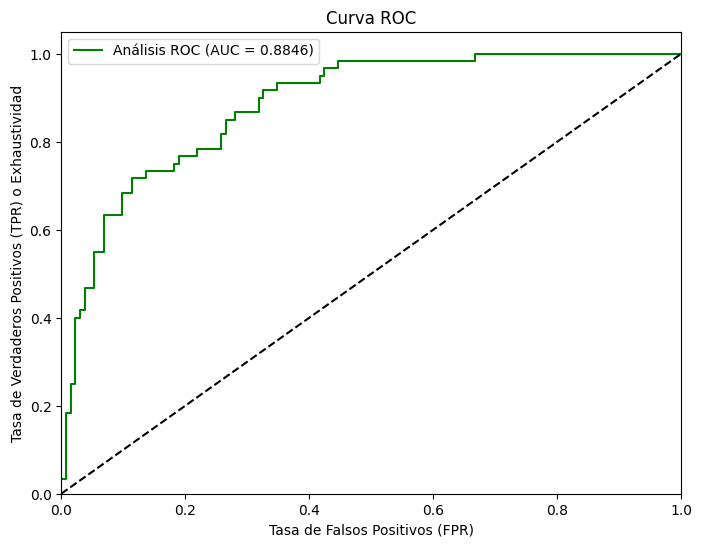

In [6]:
# Predecimos las probabilidades
y_probs = modelo_regresion_logistica.predict_proba(X_test)[:,1]
y_auc = roc_auc_score(y_test, y_probs)
print(' ANÁLISIS ROC '.center(93, '='))

lr_fpr, lr_tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, color='green', label=f'Análisis ROC (AUC = {y_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR) o Exhaustividad')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.title('Curva ROC')
plt.legend(loc='best')
plt.show()


El análisis ROC nos entrega un indicador para AUC de 0.8846.  Si bien es un resultado cercano a 1, que sería el funcionamiento perfecto del clasificador, mantiene un valor más bajo de lo que estamos acostumbrados como niveles de confianza en estadística (95%, 99% o 99.9%).  En este sentido podemos decir que el modelo cumple con correctas clasificaciones ya que es superior a la completa aleatoriedad (la línea segmentada que va desde el punto [0, 0] a [1, 1] en el gráfico) pero no es suficientemente confiable lo que podría derivar en acciones negligentes, sobretodo por el hecho de que estamos analizando muestras relacionadas con salud de individuos.  Desde mi punto de vista, el modelo va por buen camino pero necesita mejores ajustes que permitan alcanzar indicadores de confianza.

Respecto a la línea divisoria, ésta es la referencia de un resultado completamente aleatorio y por lo mismo inútil como uso para clasificación científica.  La línea recta, divide además el gráfico en dos partes iguales, o sea es la frontera entre un modelo que clasifica de manera correcta si la curva está sobre la línea o un modelo que clasifica de manera incorrecta si está por debajo de la línea.  En ese sentido, valores cercanos al 0.5 (mayores o menores) nos demuestran que nuestro modelo no es mejor que tomar todas las decisiones al azar sin basarnos en la evidencia, incluso resulta peor que si los resultados fueran cercanos a 0, ya que desde ese punto de vista y usando lógica, con un resultado cercano a 0 podemos invertir los valores y conseguir un valor alto de fiabilidad (Falso - Falso = Verdadero).



